<a href="https://colab.research.google.com/github/bynalab/Deep-Learning/blob/master/meOrHubClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import cv2

def load_image(file_path):
  return cv2.imread(file_path)

def extract_label(file_name):
  return 1 if "me" in file_name else 0

train_path = "./mine/"
image_files = os.listdir(train_path)
train_images = [load_image(train_path + file) for file in image_files]
train_labels = [extract_label(file) for file in image_files]

In [0]:
ls

drive/  mine/  sample_data/


In [0]:
def preprocess_image(img, side = 96):
  min_side = min(img.shape[0], img.shape[1])
  img = img[:min_side, :min_side]
  img = cv2.resize(img, (side,side))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img/255.0


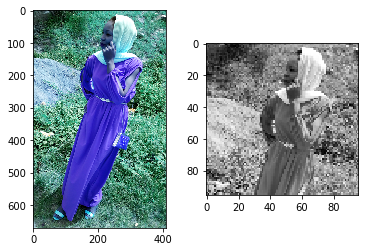

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

preview_index = 50
plt.subplot(1,2,1)
plt.imshow(train_images[preview_index])
plt.subplot(1,2,2)
plt.imshow(preprocess_image(train_images[preview_index]), cmap = "gray")

In [0]:
import numpy as np
train_images = np.expand_dims(train_images, axis = -1)
train_labels = np.array(train_labels)
print(train_images.shape, train_labels.shape)

(76, 96, 96, 1) (76,)


In [0]:
for i in range(len(train_images)):
  train_images[i] = preprocess_image(train_images[i])

In [0]:
import tensorflow as tf
print("Tensorflow version", tf.__version__)

layers = [
  tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=train_images.shape[1:]),
  tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

  tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
  tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
  tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

  tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
  tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

  tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
  tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
  tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
  tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)
]
model = tf.keras.Sequential(layers)
model.compile(optimizer=tf.optimizers.Adam(),
                loss = tf.losses.SparseCategoricalCrossentropy(),
                metrics = [tf.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=5, batch_size=50)
model.save_weights("model.tf")


Tensorflow version 2.0.0
Train on 76 samples
Epoch 1/5
76/76 [==============================] - 2s 26ms/sample - loss: 0.6855 - sparse_categorical_accuracy: 0.5395
Epoch 2/5
76/76 [==============================] - 1s 13ms/sample - loss: 0.8038 - sparse_categorical_accuracy: 0.6053
Epoch 3/5
76/76 [==============================] - 1s 13ms/sample - loss: 0.6781 - sparse_categorical_accuracy: 0.5395
Epoch 4/5
76/76 [==============================] - 1s 14ms/sample - loss: 0.6949 - sparse_categorical_accuracy: 0.4737
Epoch 5/5
76/76 [==============================] - 1s 14ms/sample - loss: 0.6826 - sparse_categorical_accuracy: 0.5526


In [0]:
from google.colab import files
uploads = files.upload()

Saving IMG-20190718-WA0003.jpg to IMG-20190718-WA0003.jpg
Saving IMG-20190718-WA0004.jpg to IMG-20190718-WA0004.jpg
Saving IMG-20190718-WA0005.jpg to IMG-20190718-WA0005.jpg
Saving IMG-20190719-WA0000.jpg to IMG-20190719-WA0000.jpg
Saving IMG-20190719-WA0001.jpg to IMG-20190719-WA0001.jpg
Saving IMG-20190719-WA0002.jpg to IMG-20190719-WA0002.jpg
Saving IMG-20190719-WA0003.jpg to IMG-20190719-WA0003.jpg


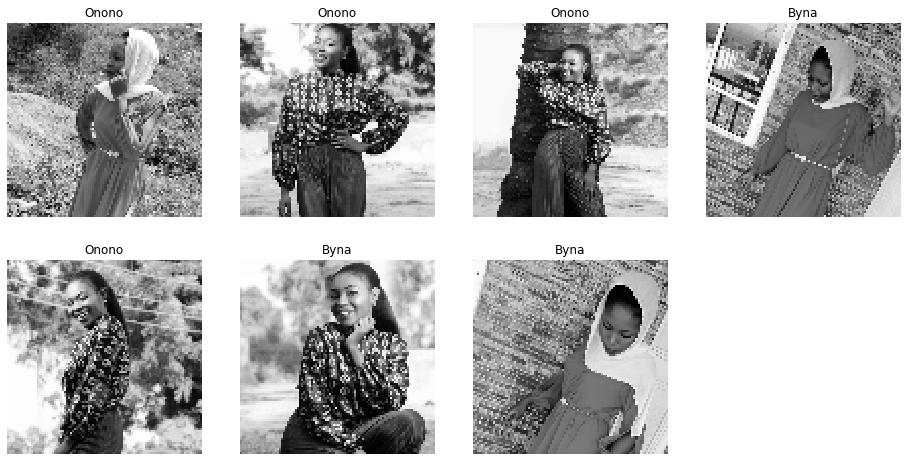

In [0]:
eval_images = [preprocess_image(load_image(file)) for file in uploads.keys()]
eval_model = tf.keras.Sequential(layers)
eval_model.load_weights("model.tf")
eval_predictions = eval_model.predict(np.expand_dims(eval_images, axis = -1))

cols = 4
rows = np.ceil(len(eval_images)/cols)
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)
for i in range(len(eval_images)):
  plt.subplot(rows, cols, i+1)
  plt.imshow(eval_images[i], cmap="gray")
  plt.title("Byna" if np.argmax(eval_predictions[i]) == 1 else "Onono")
  plt.axis("off")


